# Initial Explonatory Analysis

The Energy Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. As of June 2018, the database includes around 28,500 power plants from 164 countries. It will be continuously updated as data becomes available. The most recent release of the Global Power Plant Database 1.1 includes the addition of two countries (China and Fiji), over 3,000 power plants, and nearly 1300 gigawatts of power capacity. We highly recommend using version 1.1, available online as of June 2018.

## Data understanding

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [4]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `fuel1` (text): energy source used in electricity generation or export
- `fuel2` (text): energy source used in electricity generation or export
- `fuel3` (text): energy source used in electricity generation or export
- `fuel4` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013 
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015 
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `estimated_generation_gwh` (number): estimated annual electricity generation in gigawatt-hours for the year 2014 (see [0])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# The code was removed by Watson Studio for sharing.

Let's discover a data. According to description goal of our research is investigating prediction of the electricity.

In [10]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


Pandas converted this data to right format except strings according to output below.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 22 columns):
country                     28664 non-null object
country_long                28664 non-null object
name                        28644 non-null object
gppd_idnr                   28664 non-null object
capacity_mw                 28664 non-null float64
latitude                    28664 non-null float64
longitude                   28664 non-null float64
fuel1                       28661 non-null object
fuel2                       1705 non-null object
fuel3                       296 non-null object
fuel4                       108 non-null object
commissioning_year          14952 non-null float64
owner                       18093 non-null object
source                      28664 non-null object
url                         28664 non-null object
geolocation_source          28243 non-null object
year_of_capacity_data       16145 non-null float64
generation_gwh_2013         439 non-null 

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.000000,28664.000000,2.866400e+04,14952.000000,16145.000000,439.000000,455.000000,958.000000,8326.000000,27536.000000
mean,186.097600,68.817502,9.925621e+01,1994.698521,2016.035367,2339.270238,2622.049124,1859.660249,532.668481,807.796919
std,523.027253,3610.172087,1.092781e+04,23.406231,1.258145,4384.011370,4138.194312,3965.618811,1935.490760,2687.873796
min,1.000000,-77.847000,-1.799777e+02,1896.000000,2000.000000,0.000000,0.000000,0.000000,-768.620000,0.000000
25%,4.795850,28.010225,-7.905748e+01,1985.000000,2016.000000,226.735625,253.466300,57.898941,3.197500,8.099628
50%,18.640000,39.950000,-3.928400e+00,2004.000000,2016.000000,731.334950,1015.676100,468.989500,20.354000,44.796959
75%,99.200000,46.980275,2.100702e+01,2012.000000,2016.000000,2636.217675,3170.871000,2152.211500,176.508999,293.907237
max,22500.000000,415750.000000,1.075744e+06,2018.000000,2018.000000,50834.000000,28127.000000,59546.865000,32377.477000,92268.763466


Current dataset contains 28664 objects and 22 features.

In [28]:
df.shape

(28664, 22)

## Discover NaN columns

First of all, let's retrieve cols which contains NaN values.

In [6]:
cols = df.columns[df.isnull().any().values]
cols

Index(['name', 'fuel1', 'fuel2', 'fuel3', 'fuel4', 'commissioning_year',
       'owner', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'estimated_generation_gwh'],
      dtype='object')

Explore NaN values in cols (green=null, blue=not null)

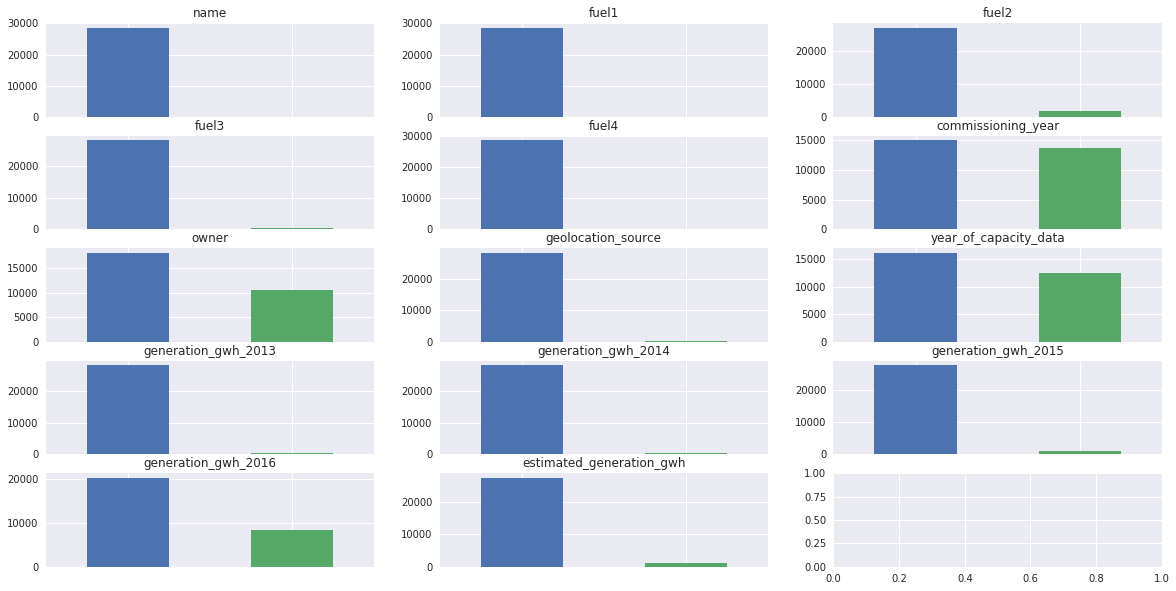

In [7]:
fig, axes = plt.subplots(5, 3, figsize=(20,5))
axes = axes.reshape(15,1)
for i, col in enumerate(cols):
    current_ax = axes[i][0]
    df[col].isnull().value_counts().plot(kind='bar', ax=current_ax, figsize=(20,10))
    current_ax.set_title(col)
    current_ax.set_xticklabels([])

## Dependence Analysis

Correlation matrix:

In [8]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
capacity_mw,1.000000,-0.003177,-0.001953,0.014130,-0.000657,0.887546,0.834235,0.781531,0.866208,0.909036
latitude,-0.003177,1.000000,0.990304,-0.192670,-0.021193,0.025631,0.176128,0.201377,-0.031809,-0.002826
longitude,-0.001953,0.990304,1.000000,0.061198,-0.232530,-0.009714,-0.063284,0.186944,0.061465,-0.001687
commissioning_year,0.014130,-0.192670,0.061198,1.000000,0.192760,0.142839,0.129910,0.199157,-0.054859,0.000924
year_of_capacity_data,-0.000657,-0.021193,-0.232530,0.192760,1.000000,NaN,NaN,0.255699,NaN,0.004648
generation_gwh_2013,0.887546,0.025631,-0.009714,0.142839,NaN,1.000000,0.968824,0.908226,NaN,0.988231
generation_gwh_2014,0.834235,0.176128,-0.063284,0.129910,NaN,0.968824,1.000000,0.961055,NaN,NaN
generation_gwh_2015,0.781531,0.201377,0.186944,0.199157,0.255699,0.908226,0.961055,1.000000,NaN,0.600522
generation_gwh_2016,0.866208,-0.031809,0.061465,-0.054859,NaN,NaN,NaN,NaN,1.000000,0.887455
estimated_generation_gwh,0.909036,-0.002826,-0.001687,0.000924,0.004648,0.988231,NaN,0.600522,0.887455,1.000000


## Distribution Analysis

In [9]:
int_df = df.iloc[:,np.where(df.dtypes == np.float64)[0]]

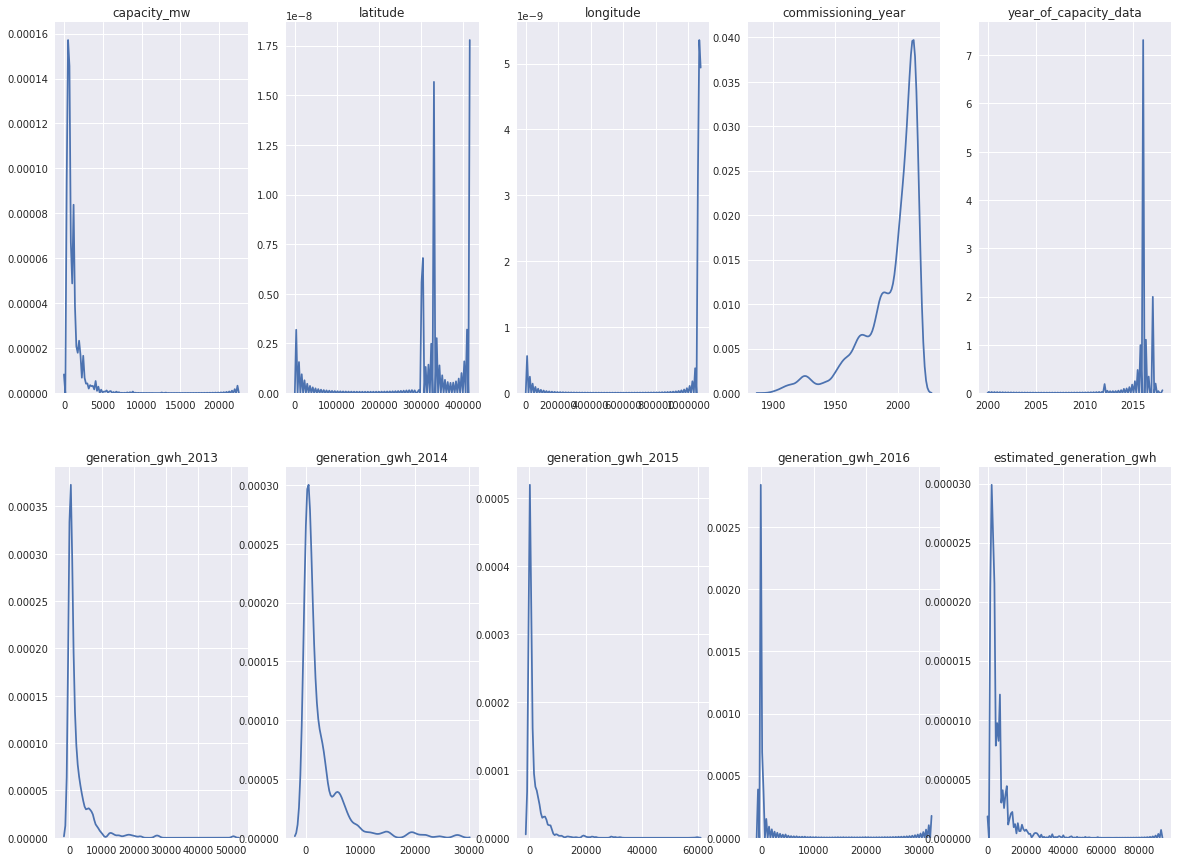

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 15))

for i, ax in zip(int_df.columns, axes.flatten()):
    sns.kdeplot(int_df[i], ax = ax)
    ax.set_title(i)
    ax.get_legend().remove()